In [1]:
using DataFrames
# read data
dt = readtable("binary.csv");

In [2]:
# show the first several rows
head(dt)

,admit,gre,gpa,rank
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.0,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.0,2


In [75]:
# get y and X
y = dt[:admit];
X = dt[[:gre, :gpa]];
m = size(X, 2)
std_vec = [std(X[i]) for i in 1:m]
# do feature rescaling
for i = 1:m
    X[i] = X[i]/std_vec[i]
end
n = length(y)
y = convert(Array, y);
X_full = convert(Matrix, [X ones(n)]);

In [12]:
# define the negative log-likelihood
function negloglik(a, y, X_full)
    value = 0.0;
    tmp = X_full*a;
    for i = 1:length(y)
        value = value-y[i]*tmp[i]+log(1+exp(tmp[i]));
    end
    return value;
end;

In [13]:
# test the function
negloglik([0; 0; 0], y, X_full)

277.2588722239787

In [14]:
# get the L
L = norm(X_full)^2/4

10754.278798544321

In [15]:
# get the step size alpha
alpha = 1/L

9.298624470618691e-5

In [17]:
# define the gradient
function negloglik_grad(a, y, X_full)
    value = zeros(1, size(X_full, 2))
    n = length(y);
    tmp = exp(X_full*a);
    tmp = tmp./(1.+tmp).-y;
    for i = 1:n
        value = value+tmp[i]*X_full[i, :]
    end
    return value';
end;

In [54]:
a0 = [0; 0; 0];
# T is large enough for convergence
T = 1e6;
eps = norm(negloglik_grad(a0, y, X_full))*1e-6;
for t = 1:T
    grad = negloglik_grad(a0, y, X_full)
    a = a0-alpha*grad;
    if norm(grad)<eps
        @printf "The algorithm converges at the %d-th iteration." t
        break
    end
    a0 = a;
end

The algorithm converges at the 107425-th iteration.

In [55]:
negloglik(a, y, X_full)

240.17199113390646

In [56]:
# rescale the coefficients
beta = a./[std_vec; 1]

3x1 Array{Any,2}:
  0.00269049
  0.754486  
 -4.94856   

### Question 2

The coefficients before the covariates GRE and GPA are 0.00269049 and 0.754486, respectively. The intercept is -4.94856.

### Question 3 & 4

In [60]:
# draw a scatterplot
using PyPlot

INFO: Loading help data...


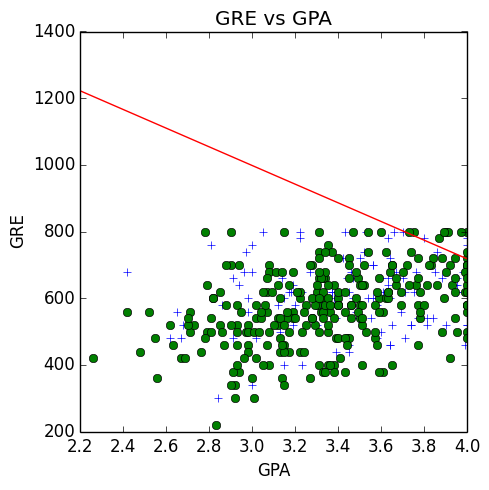

In [70]:
fig = figure(figsize = (5, 5));
plot(X[y.==1, :gpa], X[y.==1, :gre], "+");
plot(X[y.==0, :gpa], X[y.==0, :gre], "o");
# the decision boundary should be a^Tx+\beta=0
xs = 2.2:0.1:4.0;
ys = (-beta[3]-beta[2]*xs)./beta[1];
plot(xs, ys)
xlabel("GPA");
ylabel("GRE");
title("GRE vs GPA");